In [1]:
from data_prep import *
from model import *
import matplotlib.pyplot as plt
from utils import *
import torch.optim as optim
import torch.nn as nn
from PIL import Image
from ssim import *

In [2]:
train_loader = prep_data()

In [3]:
device= 'cpu'
if torch.cuda.is_available():
    device= 'cuda'

In [3]:
model = Model(depth= 1)

In [4]:
lr = 0.01
optimizer = optim.Adam(model.parameters(), lr)
criterion = nn.MSELoss()

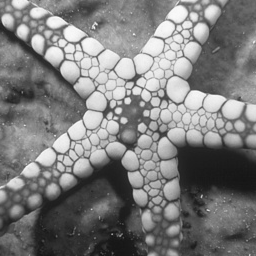

In [5]:
test_img = Image.open('04.png')
test_img

In [6]:
epochs= 40
losses, outputs, chosen_img = train(model, test_img, train_loader, optimizer, criterion, epochs, 15)

epoch 0: avg loss= 14479.27080078125, time taken= 0.0 min 5.131sec
epoch 1: avg loss= 12059.776171875, time taken= 0.0 min 4.494sec
epoch 2: avg loss= 9111.960986328126, time taken= 0.0 min 4.925sec
epoch 3: avg loss= 5984.93134765625, time taken= 0.0 min 6.576sec
epoch 4: avg loss= 3273.019482421875, time taken= 0.0 min 6.965sec
epoch 5: avg loss= 1537.5207092285157, time taken= 0.0 min 9.445sec
epoch 6: avg loss= 748.1720397949218, time taken= 0.0 min 8.832sec
epoch 7: avg loss= 556.5519897460938, time taken= 0.0 min 9.071sec
epoch 8: avg loss= 497.65578308105466, time taken= 0.0 min 9.361sec
epoch 9: avg loss= 464.2782775878906, time taken= 0.0 min 9.387sec
epoch 10: avg loss= 439.47011413574216, time taken= 0.0 min 9.123sec
epoch 11: avg loss= 418.2206237792969, time taken= 0.0 min 8.480sec
epoch 12: avg loss= 409.67369689941404, time taken= 0.0 min 8.534sec
epoch 13: avg loss= 369.7316162109375, time taken= 0.0 min 8.569sec
epoch 14: avg loss= 363.9764068603516, time taken= 0.0 mi

In [8]:
torch.save(model.state_dict(), 'simple_cnn_best.pth')

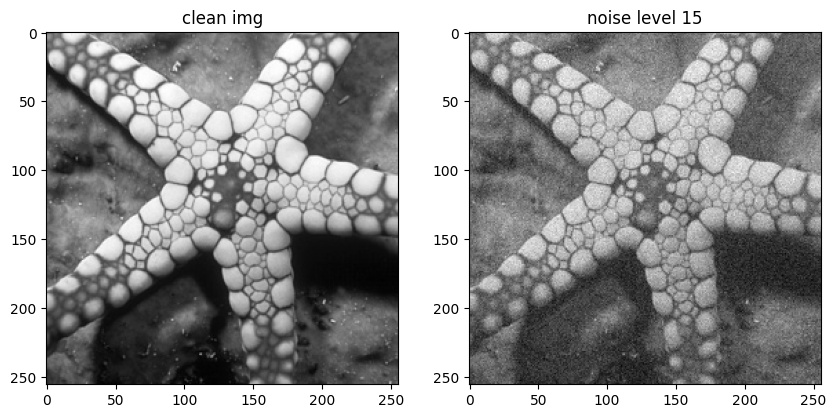

In [9]:
plt.figure(figsize= (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap= 'gray')
plt.title('clean img')
plt.subplot(1, 2, 2)
plt.imshow(chosen_img, cmap= 'gray')
plt.title('noise level 15')
plt.show()

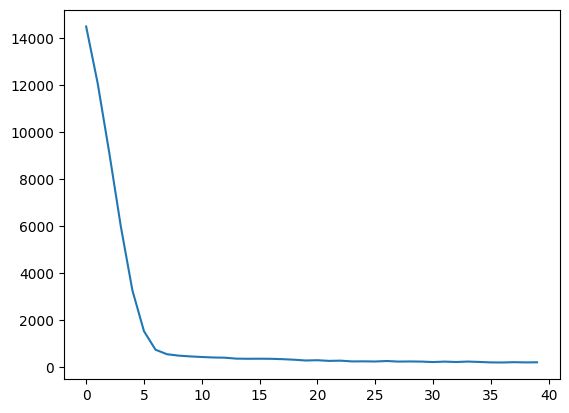

In [11]:
plt.plot(losses)

In [12]:
outputs = [Image.fromarray(outputs[i]) for i in range(epochs)]

In [13]:
frame_one = outputs[0]
frame_one.save('op_2.gif', format= 'GIF', append_images= outputs, save_all= True, duration= 250, loop= 0)

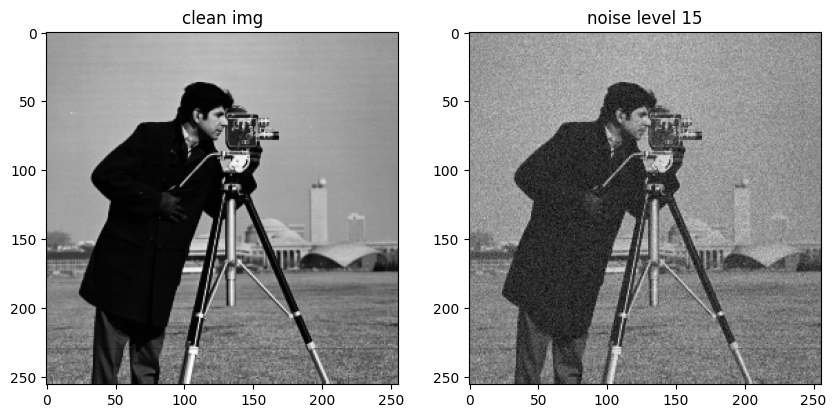

In [4]:
test = Image.open(r'01.png')
totensor = transforms.PILToTensor()
test_tensor = totensor(test).float()
noise = torch.FloatTensor(test_tensor.size()).normal_(mean=0, std= 15)

noisy_tensor = (test_tensor + noise).unsqueeze(0).to(device)

noisy = noisy_tensor.squeeze().cpu().numpy()

plt.figure(figsize= (10, 5))
plt.subplot(1, 2, 1)
plt.imshow(test, cmap= 'gray')
plt.title('clean img')
plt.subplot(1, 2, 2)
plt.imshow(noisy, cmap= 'gray')
plt.title('noise level 15')
plt.show()

In [5]:
model = Model().to(device)
model.load_state_dict(torch.load('simple_cnn_best.pth'))
model.eval()
with torch.no_grad():
    denoised_tensor = model(noisy_tensor)

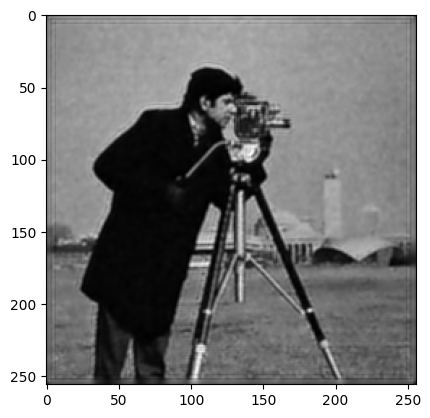

In [6]:
denoised = denoised_tensor.squeeze().cpu().numpy()
plt.imshow(denoised, cmap= 'gray')

In [7]:
ssim_map, mssim = SSIM(denoised, np.array(test))
mssim

0.8068133391837466

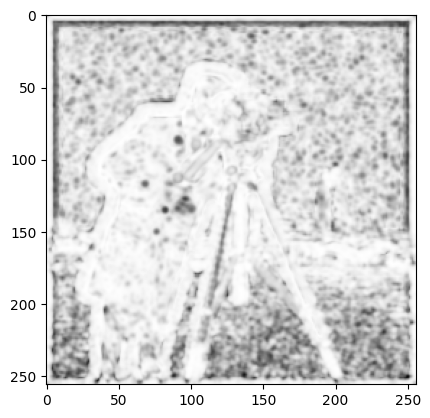

In [8]:
plt.imshow(ssim_map, cmap= 'gray')

In [11]:
set12 = 'test\Set12'
set68 = 'test\Set68'
results = 'results'

In [12]:
noiseL = 15
avg_ssim = 0
avg_psnr = 0

num = 0
with torch.no_grad():
    for img_name in os.listdir(set12):
        img_path = os.path.join(set12, img_name)
        img = Image.open(img_path)
        test_tensor = totensor(img).unsqueeze(0)
        img = np.array(img)
        noise = torch.FloatTensor(test_tensor.size()).normal_(mean=0, std= noiseL)

        test_noisy = test_tensor + noise
        test_noisy = test_noisy.to(device)

        noisy_img = test_noisy.squeeze().cpu().numpy()

        op = model(test_noisy)

        denoised = op.squeeze().cpu().numpy()

        _, mssim = SSIM(img, denoised)
        _, psnr = MSE(img, denoised)

        avg_ssim += mssim
        avg_psnr += psnr

        save_dir = os.path.join(results, set12, f'{noiseL}')

        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        plt.imsave(f'{save_dir}\denoised_{img_name}', denoised, cmap= 'gray')
        plt.imsave(rf'{save_dir}\noisy_{img_name}', noisy_img, cmap= 'gray')

        num += 1

    avg_ssim /= num
    avg_psnr /= num

    print('Avg ssim on set 12', avg_ssim)
    print('Avg psnr on set 12', avg_psnr)

Avg ssim on set 12 0.826187298489162
Avg psnr on set 12 25.247711986508676


In [13]:
noiseL = 15
avg_ssim = 0
avg_psnr = 0

num = 0
with torch.no_grad():
    for img_name in os.listdir(set68):
        img_path = os.path.join(set68, img_name)
        img = Image.open(img_path)
        test_tensor = totensor(img).unsqueeze(0)
        img = np.array(img)
        noise = torch.FloatTensor(test_tensor.size()).normal_(mean=0, std= noiseL)

        test_noisy = test_tensor + noise
        test_noisy = test_noisy.to(device)

        noisy_img = test_noisy.squeeze().cpu().numpy()

        op = model(test_noisy)

        denoised = op.squeeze().cpu().numpy()

        _, mssim = SSIM(img, denoised)
        _, psnr = MSE(img, denoised)

        avg_ssim += mssim
        avg_psnr += psnr

        save_dir = os.path.join(results, set68, f'{noiseL}')

        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        plt.imsave(f'{save_dir}\denoised_{img_name}', denoised, cmap= 'gray')
        plt.imsave(rf'{save_dir}\noisy_{img_name}', noisy_img, cmap= 'gray')

        num += 1

    avg_ssim /= num
    avg_psnr /= num

    print('Avg ssim on set 68', avg_ssim)
    print('Avg psnr on set 68', avg_psnr)

Avg ssim on set 68 0.8062571244603449
Avg psnr on set 68 25.670738360142167
